In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
plt.rcParams['figure.figsize'] = [12, 5]
register_matplotlib_converters()


from src.ireland_c19_data import get_daily_c19_ireland_data, get_gov_c19_ireland_dataset
from src.c19_plotting import C19Plot

df = get_daily_c19_ireland_data()
df_hspc = get_gov_c19_ireland_dataset()

c19plot = C19Plot(df, df_hspc)
df

,date,c19_icu_cases,new_deaths,available_icu_beds,c19_ventilated_cases,new_deaths_rm,c19_icu_cases_rm,c19_ventilated_cases_rm,available_icu_beds_rm
11,2020-04-24,118,35,143,73,32.666667,123.666667,81.000000,141.666667
12,2020-04-25,123,49,139,69,36.333333,121.333333,75.000000,141.333333
13,2020-04-26,120,24,153,67,36.000000,120.333333,69.666667,145.000000
14,2020-04-27,117,15,164,68,29.333333,120.000000,68.000000,152.000000
15,2020-04-28,113,57,151,72,32.000000,116.666667,69.000000,156.000000
16,2020-04-29,103,31,141,69,34.333333,111.000000,69.666667,152.000000
17,2020-04-30,105,42,146,73,43.333333,107.000000,71.333333,146.000000
18,2020-05-01,99,33,134,67,35.333333,102.333333,69.666667,140.333333
19,2020-05-02,98,21,131,67,32.000000,100.666667,69.000000,137.000000
20,2020-05-03,93,17,143,60,23.666667,96.666667,64.666667,136.000000


In [14]:
df_hspc.tail()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,...,RequiringICUCovidCases_new,RequiringICUCovidCases_new_rm,HospitalisedAged5_new_rm,HospitalisedAged5to14_new_rm,HospitalisedAged15to24_new_rm,HospitalisedAged25to34_new_rm,HospitalisedAged35to44_new_rm,HospitalisedAged45to54_new_rm,HospitalisedAged55to64_new_rm,HospitalisedAged65up_new_rm
88,-856335.869598,7.036492e+06,2020-05-29 00:00:00+00:00,39,24876,6,1645,21929,21929,2020/05/27 00:00:00+00,...,0.0,3.000000,0.0,0.0,0.333333,1.333333,1.000000,2.333333,1.000000,7.000000
89,-856335.869598,7.036492e+06,2020-05-30 00:00:00+00:00,59,24929,9,1651,21929,21929,2020/05/28 00:00:00+00,...,4.0,3.000000,0.0,0.0,0.333333,0.333333,2.000000,2.000000,0.666667,4.333333
90,-856335.869598,7.036492e+06,2020-05-31 00:00:00+00:00,66,24990,2,1652,21929,21929,2020/05/29 00:00:00+00,...,0.0,1.333333,0.0,0.0,0.333333,0.666667,1.333333,1.000000,0.333333,2.333333
91,-856335.869598,7.036492e+06,2020-06-01 00:00:00+00:00,77,25062,1,1650,21929,21929,2020/05/30 00:00:00+00,...,0.0,1.333333,0.0,0.0,0.000000,0.333333,1.000000,1.000000,0.333333,2.666667
92,-856335.869598,7.036492e+06,2020-06-02 00:00:00+00:00,10,25066,8,1658,21929,21929,2020/05/31 00:00:00+00,...,0.0,0.000000,0.0,0.0,0.000000,0.333333,0.000000,1.333333,0.666667,2.333333


In [15]:
# don't need this anymore
#c19plot.daily_death_vs_icu()

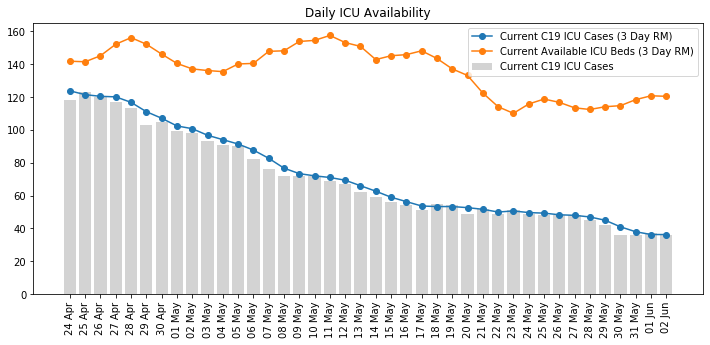

In [16]:
c19plot.daily_icu_availability()

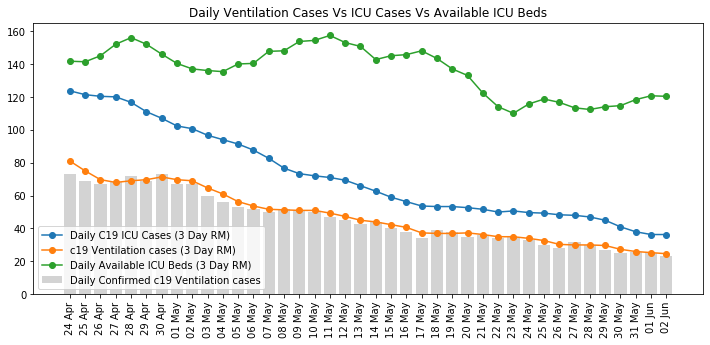

In [17]:
c19plot.daily_icu_vs_ventilation()

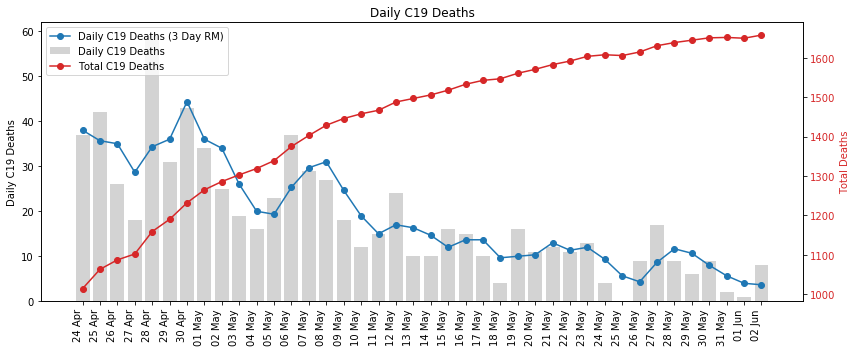

In [18]:
c19plot.hspc_daily_deaths()

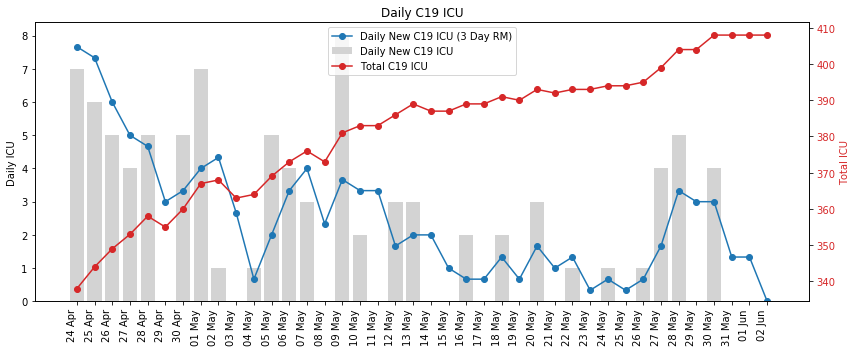

In [19]:
c19plot.hspc_icu()

In [ ]:
c19plot.hspc_hospitilisation()

In [ ]:
c19plot.hspc_hospitilisation_less_14()

In [ ]:
c19plot.hspc_hospitilisation_less_45()

In [ ]:
c19plot.hspc_hospitilisation_45_to_65()

In [ ]:
c19plot.hspc_hospitilisation_greater_65()